# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [52]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [53]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [54]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [56]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=1000) # Add parameters to the model!
model.fit(X_train,y_train) # Complete this method call!

RandomForestClassifier(n_estimators=1000)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [57]:
# Generate predictions here!
# make predictions
y_pred = model.predict(X_test)

In [58]:
# Calculate performance metrics here!
# accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("Precision :", metrics.precision_score(y_test,y_pred))
print("Recall :", metrics.recall_score(y_test,y_pred))

Accuracy:  0.9036144578313253
Precision : 0.8181818181818182
Recall : 0.04918032786885246


- precision score and recall score, this shows us a score of 0.86 which is not bad, but could be improved.

- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

<b>Accuracy measures the proportion of correct predictions out of the total number of predictions made by the model.
It is calculated as the ratio of the number of correct predictions to the total number of predictions.</b>

- Accuracy is a general measure of model performance across all classes

<b>Precision measures the proportion of true positive predictions (correct positive predictions) out of all positive predictions made by the model</b>

- Precision is useful when the cost of false positives is high

<b>Recall measures the proportion of true positive predictions (correct positive predictions) out of all actual positive instances in the dataset</b>

- It focuses on the ability of the model to identify all relevant instances

#### Summary:

- Accuracy provides an overall measure of model correctness.
- Precision focuses on the accuracy of positive predictions.
- Recall focuses on the ability of the model to identify all relevant instances.






In [59]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.82      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.86      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



In [60]:
cm_random_forest = metrics.confusion_matrix(y_test,y_pred)

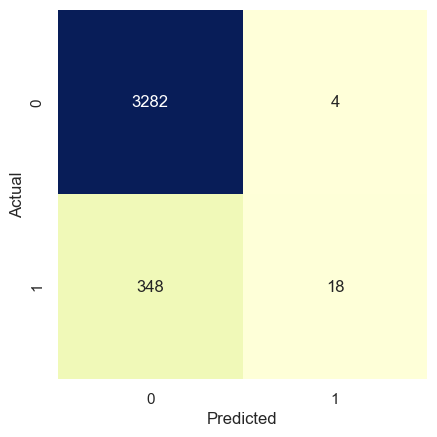

In [61]:
sns.heatmap(cm_random_forest,square=True,annot=True,cbar=False,cmap='YlGnBu',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- TN: True Negatives we have 3280 out of 3286, means that out of all the negative cases (churn = 0), we predicted 3280 as negative (hence the name True negative)


- FN: False Negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 348, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model


- FP: False Positives, 6 good sign that positives are less likely classified falcy by model


- TP: True Positives we have 18 out of 366, may be due to imbalance is not handled - but its a critical/poor value to be handled.


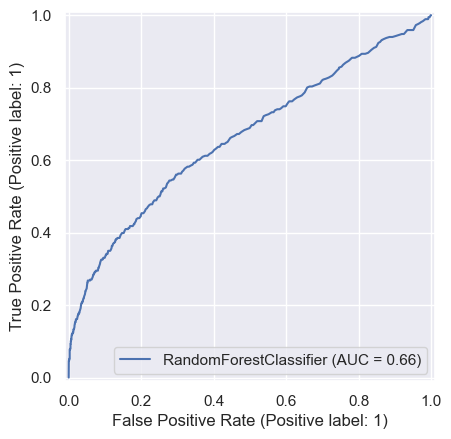

In [62]:
# compute ROC curve and area
metrics.RocCurveDisplay.from_estimator(model,X_test,y_test)

- Observing the above ROC, Further fine tuning can be done by modifying hyperparameteras like "max_depth", "leaf_nodes" - can lead to improvement

### Model Interpretability

In [63]:
feature_importances = pd.DataFrame({
    'features':X_train.columns,
    'importance':model.feature_importances_
}).sort_values(by = 'importance', ascending= True).reset_index()

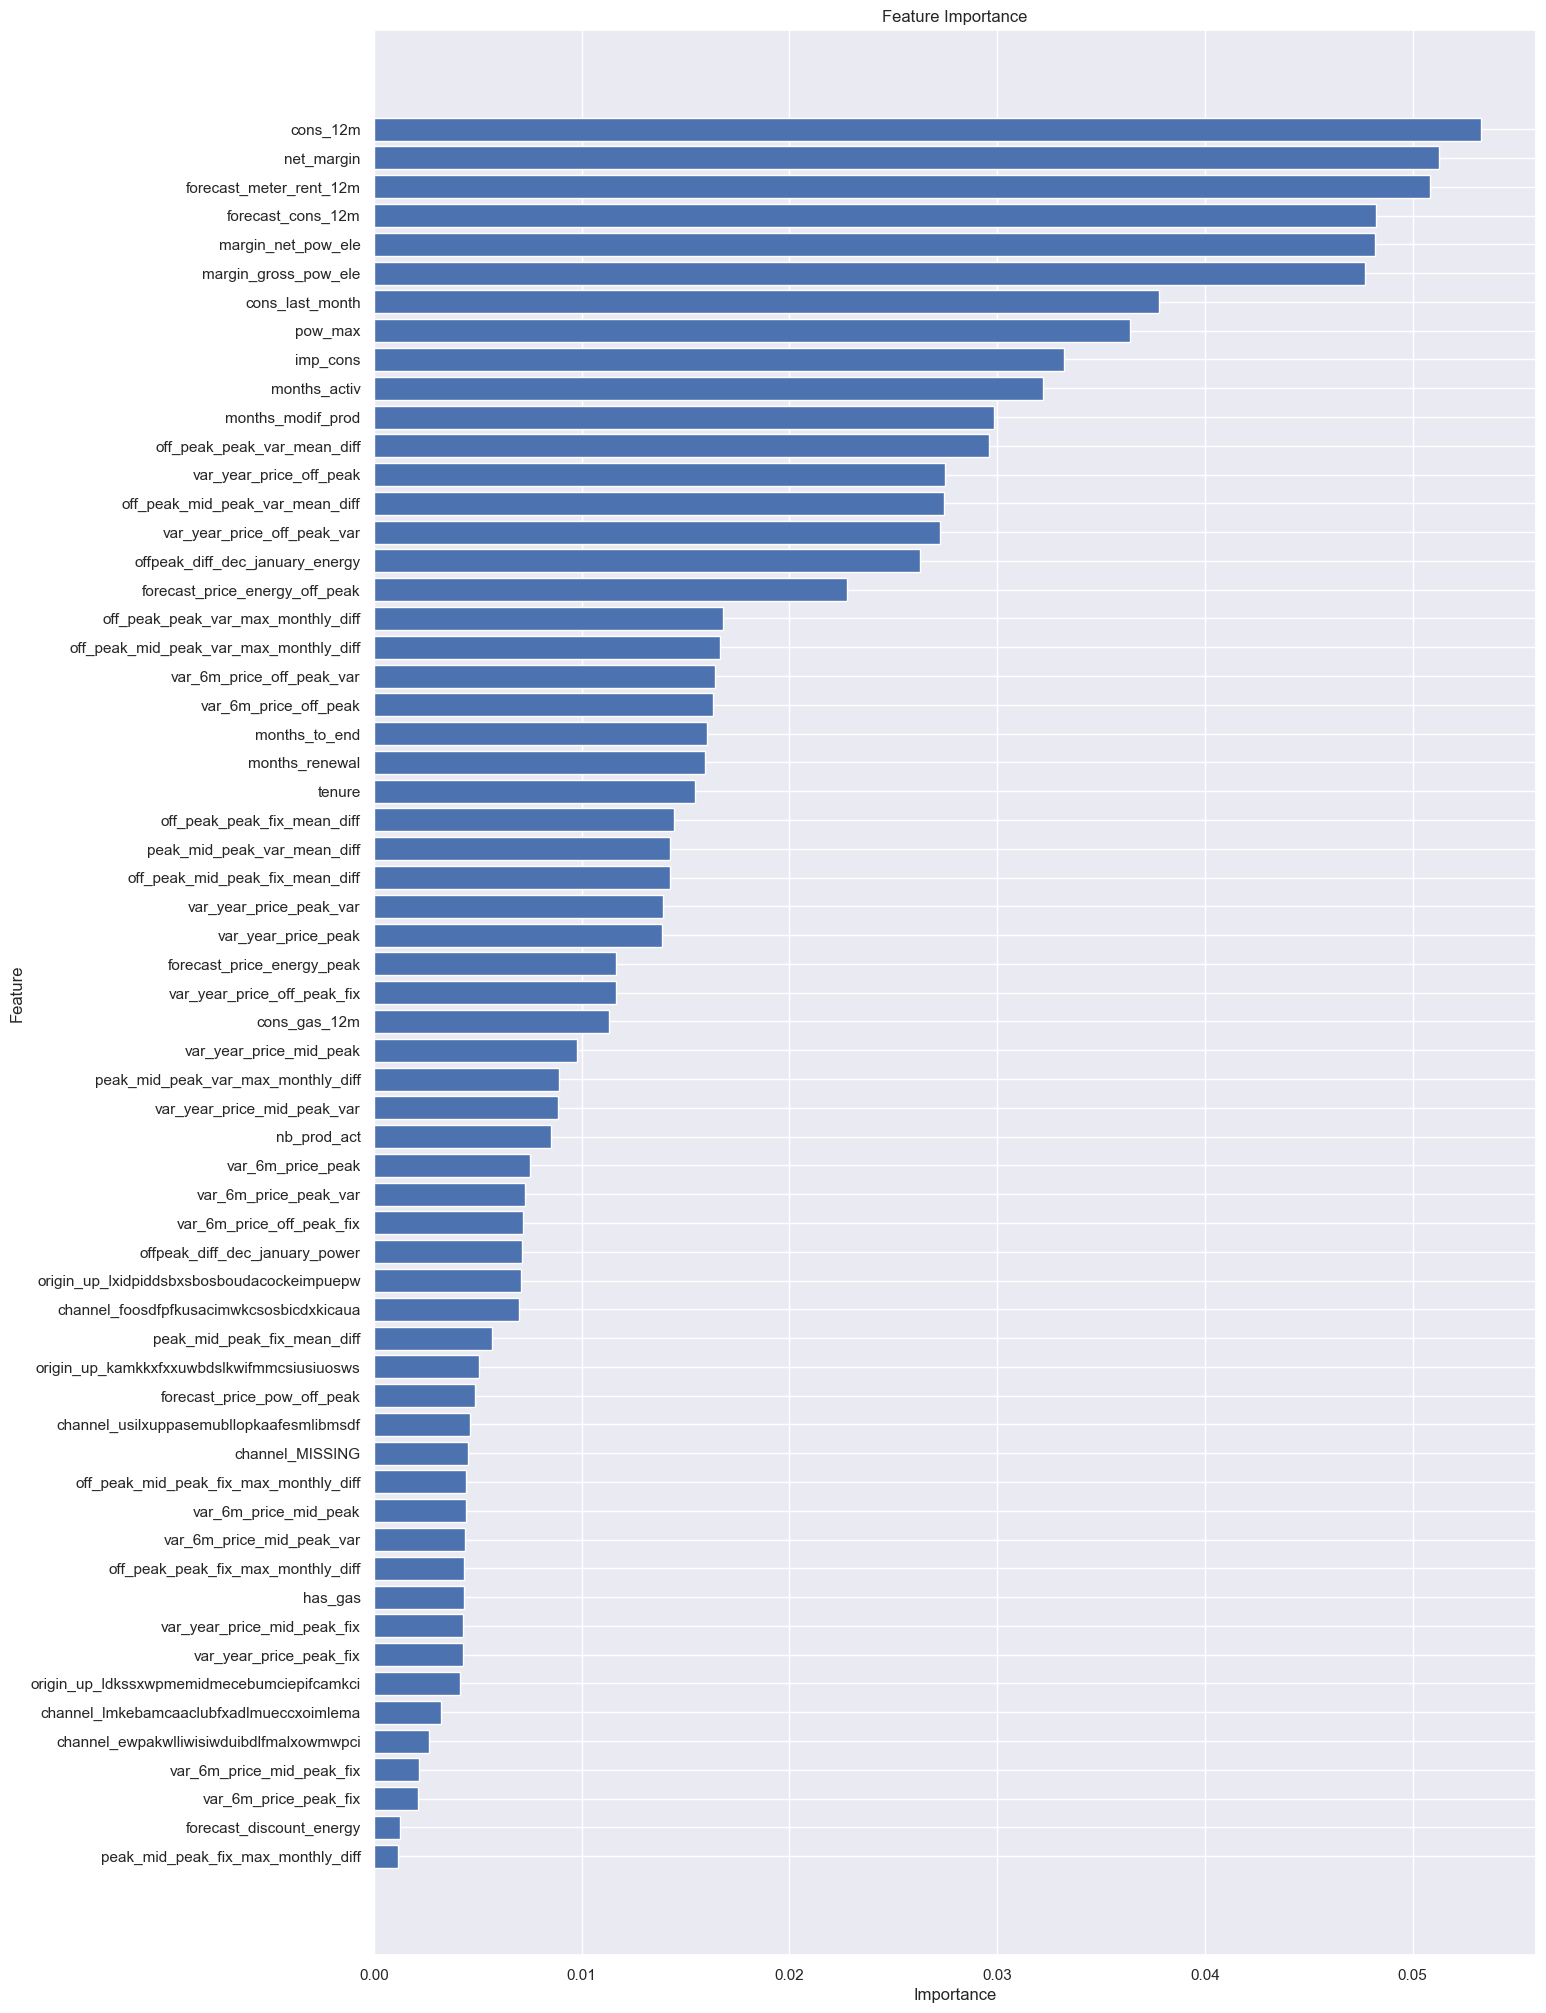

In [64]:
plt.figure(figsize=(15,25))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)),feature_importances['importance'])
plt.ylabel('Feature')
plt.yticks(range(len(feature_importances)),feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [65]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [66]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [67]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

### Interpretation: 
- Net margin and consumption over 12 months are main drivers for churn, followed by forecast_meter_rent and gross margin and net margin for Power subscription has also a significant affect on Churn.
- Time related factors like tenure, months_renewal  have almost equal and effective impact on churn

- It supports our analysis in the previous task(Task 2 - EDA Analysis) that the Price sensitivity is not a influential factor for Customer Churn at Power Co

### Invesigate the feasibility of discount strategy that was suggested for customers likely to churn

##### can be performed if there are discount related information regarding gas and electricity in the adat